## 1. Import the necessary libraries 

In [1]:
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [11]:
#these libraries needed for statistical evidence
from statsmodels.stats.weightstats import ztest
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import f_oneway

## 2. Read the data as a data frame

In [2]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 3. Perform basic EDA which should include the following and print out your insights at every step.

### a. Shape of the data

In [6]:
data.shape #this give us number of row(1338) and number of columns(7)

(1338, 7)

### b. Data type of each attribute

In [7]:
data.info() # it give insight about how many categorical and continous are present in dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### c. Checking the presence of missing values

In [8]:
data.isna().any().any() #this give us any missing value in entire dataframe

False

OR 

In [11]:
data.isna().apply(pd.value_counts) #this give us any missing value in every columns of  dataframe

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


OR

In [9]:
data.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

### d. 5 point summary of numerical attributes

In [19]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

In [22]:
sb.set(color_codes=True)

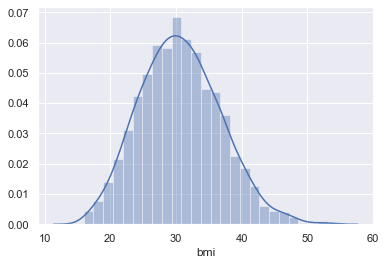

In [29]:
sb.distplot(data['bmi']);

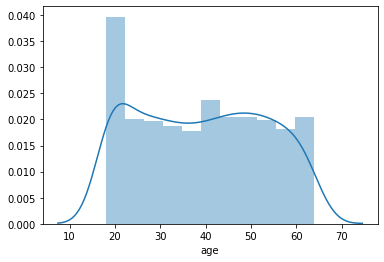

In [16]:
sb.distplot(data['age']);

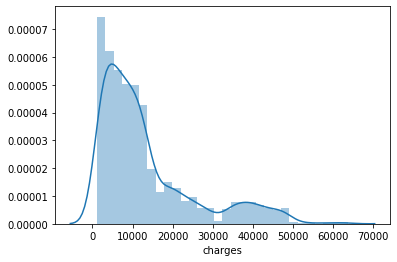

In [17]:
sb.distplot(data['charges']);

### f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [19]:
data.skew() 

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

### g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

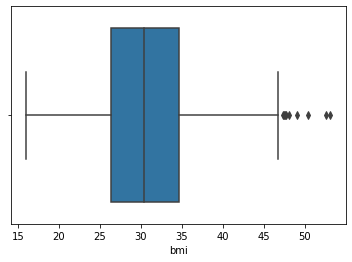

In [23]:
sb.boxplot(data['bmi'])#some outliers are presence

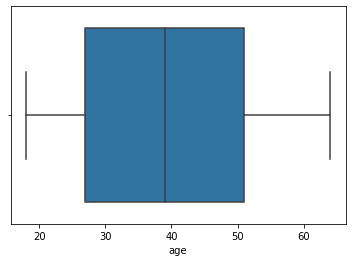

In [24]:
sb.boxplot(data['age'])#No outliers are presence

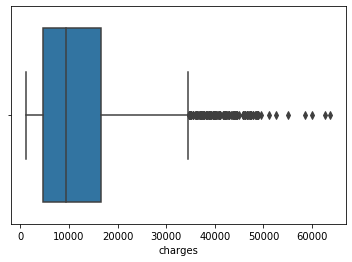

In [25]:
sb.boxplot(data['charges'])#More outliers are presence

### h. Distribution of categorical columns (include children)

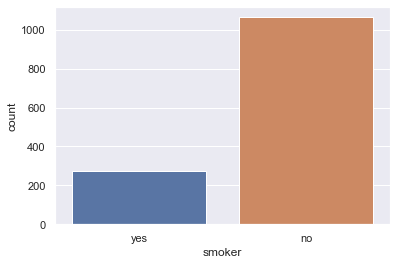

In [38]:
sb.countplot(data['smoker'])#In our data set nonsmoker are larger in number compare to smoker

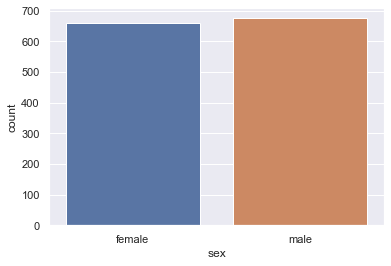

In [39]:
sb.countplot(data['sex'])# this give that we balanced gender in our dataframe

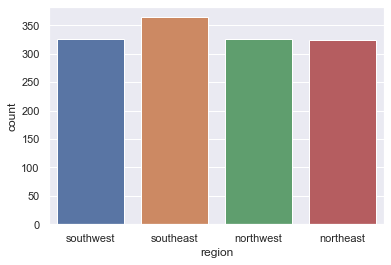

In [40]:
sb.countplot(data['region'])

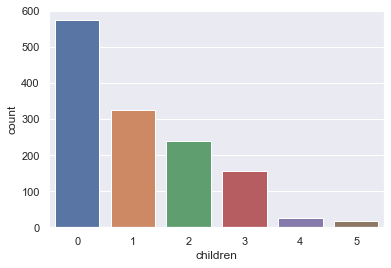

In [41]:
sb.countplot(data['children'])

### i. Pair plot that includes all the columns of the data frame

We I directly used sb.pairplot then it will only plot for continous in order to get categorical value in our data
1 We Have conver categorical into continous for that I used labelEncoder 

In [31]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
data['sexLabel'] = labelencoder.fit_transform(data.sex)
data['smokerLabel'] = labelencoder.fit_transform(data.smoker)
data['regionLabel'] = labelencoder.fit_transform(data.region)

In [32]:
data #see every categorical get value as per how many category present in that columns eg.In smoker yes = 1 and No = 0 

,age,sex,bmi,children,smoker,region,charges,sexLabel,smokerLabel,regionLabel
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,2
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,3


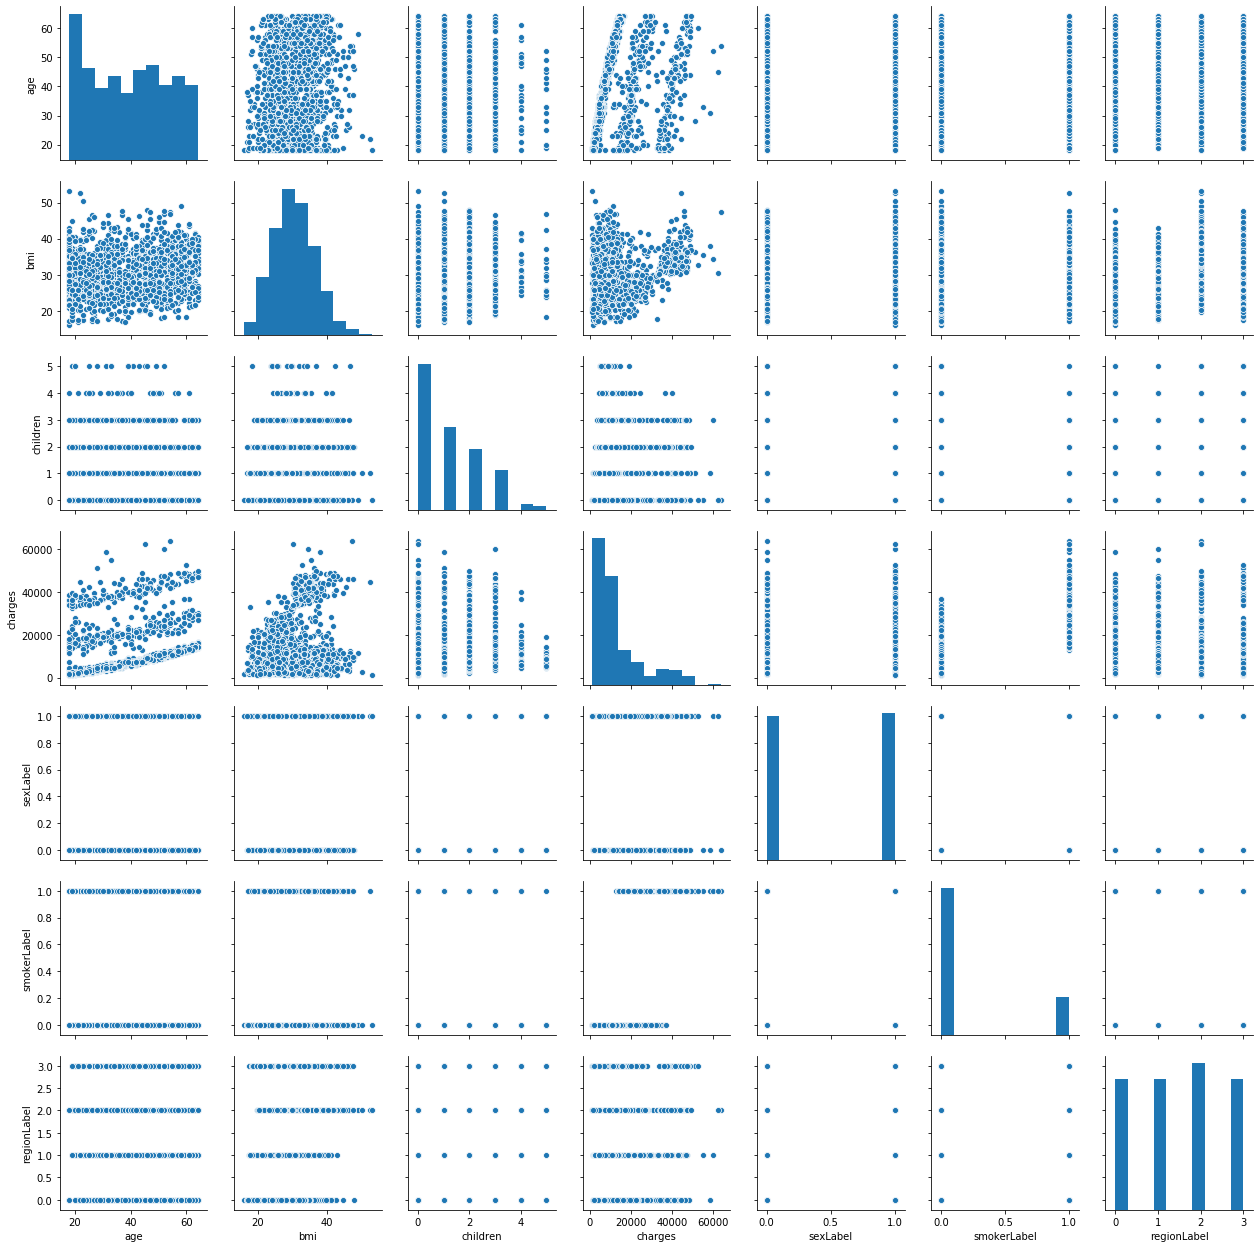

In [34]:
sb.pairplot(data)#include all columns in it

## 4. Answer the following questions with statistical evidence

### a. Do charges of people who smoke differ significantly from the people who don't?

In [4]:
HO = "charges for smoker and non-smoker are equal"
HA = "charges for smoker and non-smoker are different"

Its two tailed  

In [5]:
x= np.array(data[data.smoker == 'yes'].charges)  # Selecting charges corresponding to smokers 
y = np.array(data[data.smoker == 'no'].charges) # Selecting charges corresponding to non-smokers 

We can use ztest(if sample size >= 30) or t test((if sample size < 30))

In [7]:
print(len(x) , len(y))

274 1064


In [21]:
alpha = 0.05   # Let's consider a significance level of 5%

test_statistic, p_value = ztest(x, y) #Performing an  z-test
print(test_statistic, p_value)
if p_value <= alpha:
    print(f'Since the p-value, {p_value} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {p_value} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

46.664921172723716 0.0
Since the p-value, 0.0 < 0.05 (alpha) the difference is significant and we reject the Null hypothesis


## since we didn't get proper p_value let try t-test

In [20]:
test_statistic, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an  t-test
print(test_statistic, p_value)
if p_value <= alpha:
    print(f'Since the p-value, {p_value}< {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {p_value} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

46.664921172723716 8.271435842177219e-283
Since the p-value, 8.271435842177219e-283< 0.05 (alpha) the difference is significant and we reject the Null hypothesis


conclusion

from the above tests we found evidence to state that charges for smoker and non-smoker are not equal

### b. Does bmi of males differ significantly from that of females?

In [ ]:
HO = "bmi for male and female are  equal"
HA = "bmi for male and female are  different"

In [22]:
data.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [23]:
676-662

14

In [24]:
sample_male = data[data['sex'] == 'male'].bmi.iloc[:-14]#we want to get male number equal to female number from data so -14 

In [25]:
sample_female = data[data['sex'] == 'female'].bmi

In [27]:
len(sample_female)==len(sample_male)#check if length is match

True

We can use ztest(if sample size >= 30) or t test((if sample size < 30))

In [28]:
alpha = 0.05   # Let's consider a significance level of 5%

test_statistic, p_value = ztest(sample_male, sample_female)#Performing an  z-test
print(test_statistic, p_value)
if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

1.4909428836389147 0.13597649117568705
	 Since the p-value, 0.136 > 0.05 (alpha) the difference is not significant and,
    	 we fail to reject the Null hypothesis


conclusion

from the test above we found no evidence to state that bmi differ for gender

### c. Is the proportion of smokers significantly different in different genders?

In [32]:
#Test of proportions 
HO ="proportion of smoker on gender are equal "
HA ="proportion of smoker on gender are different "

In [34]:
female_smokers = data[data['sex'] == 'female'].smoker.value_counts()[1]  # number of female smokers
male_smokers = data[data['sex'] == 'male'].smoker.value_counts()[1] # number of male smokers
n_females = data.sex.value_counts()[1] # number of females in the data
n_males = data.sex.value_counts()[0] #number of males in the data

In [35]:
print([female_smokers, male_smokers] , [n_females, n_males])
print(f' Proportion of smokers in females, males = {round(115/662,2)}%, {round(159/676,2)}% respectively')

[115, 159] [662, 676]
 Proportion of smokers in females, males = 0.17%, 0.24% respectively


In [36]:
from statsmodels.stats.proportion import proportions_ztest#Performing an  Test of proportions 

stat, p_value = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])
if p_value < 0.05:
    print(f'With a p-value of {round(p_value,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(p_value,4)} the difference is not significant. aka |We fail to reject the null|')

With a p-value of 0.0053 the difference is significant. aka |We reject the null|


conclusion

from the above test we found evidence to state that proportion of smoker in gender is not equal

### d. Is the distribution of bmi across women with no children, one child and two children, the same?

Ho = "BMI are Equal for women with no children, one child and two children" OR "Number of children has no effect on bmi of women"   
Ha = "BMI are different for women with no children, one child and two children" OR "Number of children has an effect on bmi of women"

In [38]:
female_df = data[data['sex']=='female']

In [39]:
female_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.68500
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500


In [40]:
zero_child = female_df[female_df['children']==0]['bmi']
one_child  = female_df[female_df['children']==1]['bmi']
two_child  = female_df[female_df['children']==2]['bmi']

In [41]:
stat, p_value = f_oneway(zero_child, one_child, two_child)

if p_value <= 0.05:
    print(f'Since the p-value, {round(p_value, 3)} < 0.05 the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > 0.05 (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

	 Since the p-value, 0.716 > 0.05 (alpha) the difference is not significant and,
    	 we fail to reject the Null hypothesis


conclusion

from the test above we found no evidence to state that bmi of female differ due to number of child they have